In [1]:
import pandas as pd
import numpy as np
import user_agents
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
visitor = pd.read_csv('visitor-interests.csv')
visitor.head()

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company


In [3]:
visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19926 entries, 0 to 19925
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IP         19926 non-null  object
 1   UserAgent  19926 non-null  object
 2   Country    16721 non-null  object
 3   Languages  19926 non-null  object
 4   Interests  19919 non-null  object
dtypes: object(5)
memory usage: 778.5+ KB


In [4]:
def extract_os(x):

    ua = user_agents.parse(x)

    return ua.os.family

def extract_device(x):

    ua = user_agents.parse(x)

    return ua.device.family

def extract_browser(x):

    ua = user_agents.parse(x)

    return ua.browser.family

In [5]:
visitor['os'] = visitor['UserAgent'].apply(extract_os)
visitor['device'] = visitor['UserAgent'].apply(extract_device)
visitor['browser'] = visitor['UserAgent'].apply(extract_browser)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Windows'),
  Text(1, 0, 'Android'),
  Text(2, 0, 'iOS'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Ubuntu'),
  Text(5, 0, 'Linux'),
  Text(6, 0, 'MeeGo'),
  Text(7, 0, 'Windows Phone'),
  Text(8, 0, 'BlackBerry OS'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Chrome OS'),
  Text(11, 0, 'Gentoo'),
  Text(12, 0, 'FreeBSD'),
  Text(13, 0, 'Symbian OS'),
  Text(14, 0, 'Symbian^3'),
  Text(15, 0, 'Fedora'),
  Text(16, 0, 'Bada'),
  Text(17, 0, 'Tizen'),
  Text(18, 0, 'BlackBerry Tablet OS'),
  Text(19, 0, 'Solaris'),
  Text(20, 0, 'VRE'),
  Text(21, 0, 'Debian'),
  Text(22, 0, 'SUSE'),
  Text(23, 0, 'Mandriva'),
  Text(24, 0, 'Firefox OS')])

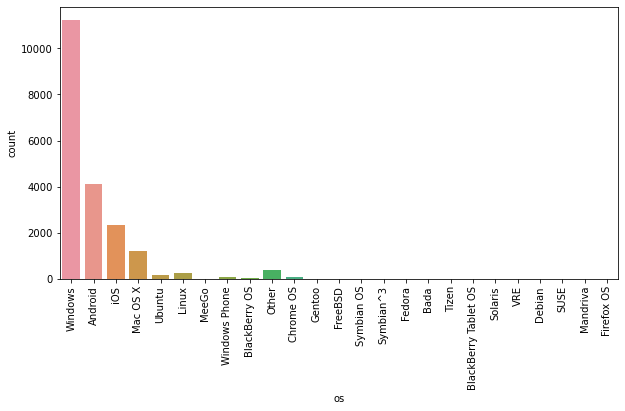

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x= visitor.os)
plt.xticks(rotation= 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 [Text(0, 0, 'Chrome'),
  Text(1, 0, 'Mobile Safari'),
  Text(2, 0, 'Samsung Internet'),
  Text(3, 0, 'IE'),
  Text(4, 0, 'Firefox'),
  Text(5, 0, 'Google'),
  Text(6, 0, 'Chrome Mobile'),
  Text(7, 0, 'Android'),
  Text(8, 0, 'Chromium'),
  Text(9, 0, 'Dragon'),
  Text(10, 0, 'UC Browser'),
  Text(11, 0, 'MiuiBrowser'),
  Text(12, 0, 'Chrome Mobile WebView'),
  Text(13, 0, 'Nokia Browser'),
  Text(14, 0, 'Opera Mobile'),
  Text(15, 0, 'IE Mobile'),
  Text(16, 0, 'Chrome Mobile iOS'),
  Text(17, 0, 'Firefox Mobile'),
  Text(18, 0, 'QQ Browser Mobile'),
  Text(19, 0, 'Opera'),
  Text(20, 0, 'Coc Coc'),
  Text(21, 0, 'Sa

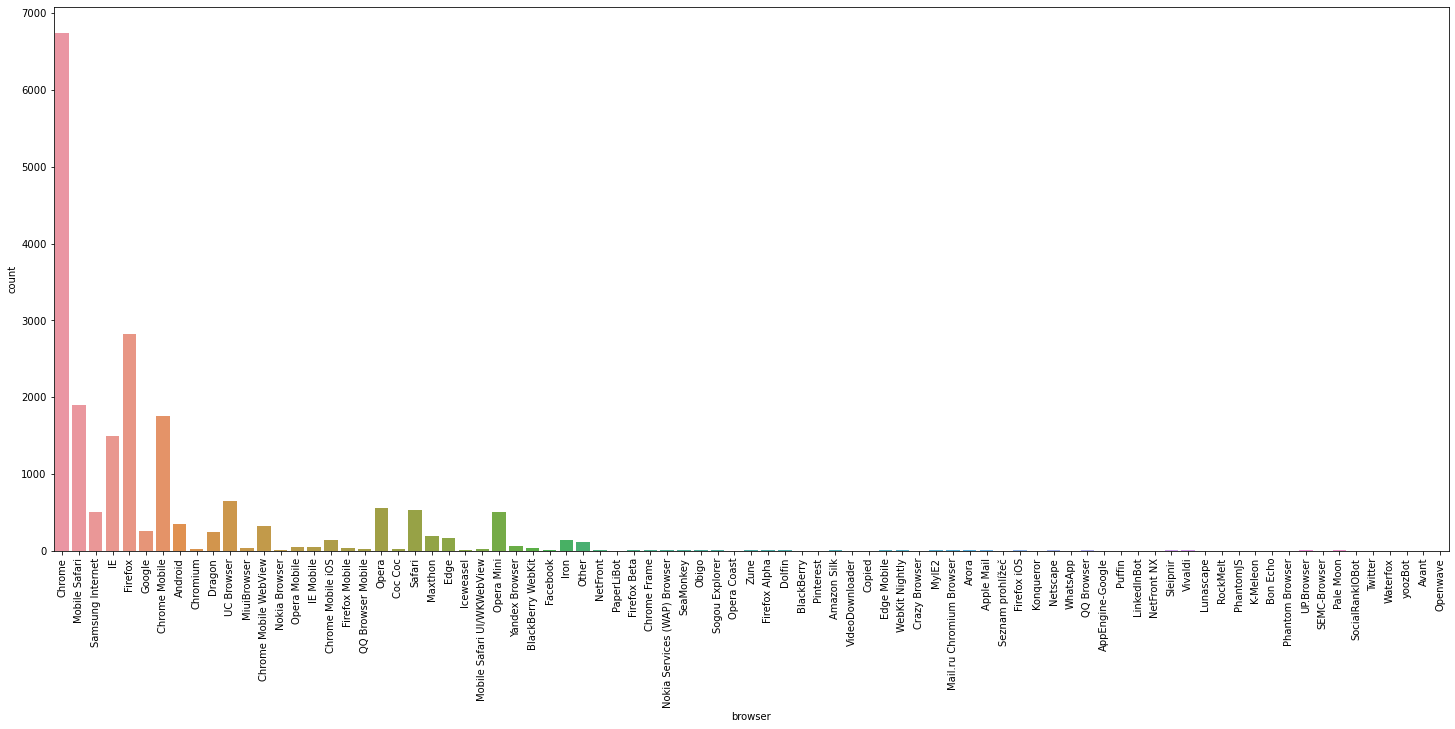

In [7]:
plt.figure(figsize=(25,10))
sns.countplot(x= visitor.browser)
plt.xticks(rotation= 90)

In [8]:
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo

In [9]:
def extract_location(x):

    res = ip2geo.get(x, api_key='free')

    return res.city

In [10]:
visitor_100 = visitor[:100]

In [ ]:
visitor_100['City'] = visitor_100['IP'].apply(extract_location)

In [13]:
sns.countplot(x= visitor_100.City)

,IP,UserAgent,Country,Languages,Interests,os,device,browser
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,Windows,Other,Chrome
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,Windows,Other,Chrome
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Windows,Other,Chrome
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Android,Nexus 9,Chrome
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,iOS,iPad,Mobile Safari
